<a href="https://colab.research.google.com/github/BiancaBb01/PMP-2024/blob/main/Tema9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercitiul 1

Output()

Output()

ERROR:pymc.stats.convergence:There were 368 divergences after tuning. Increase `target_accept` or reparameterize.


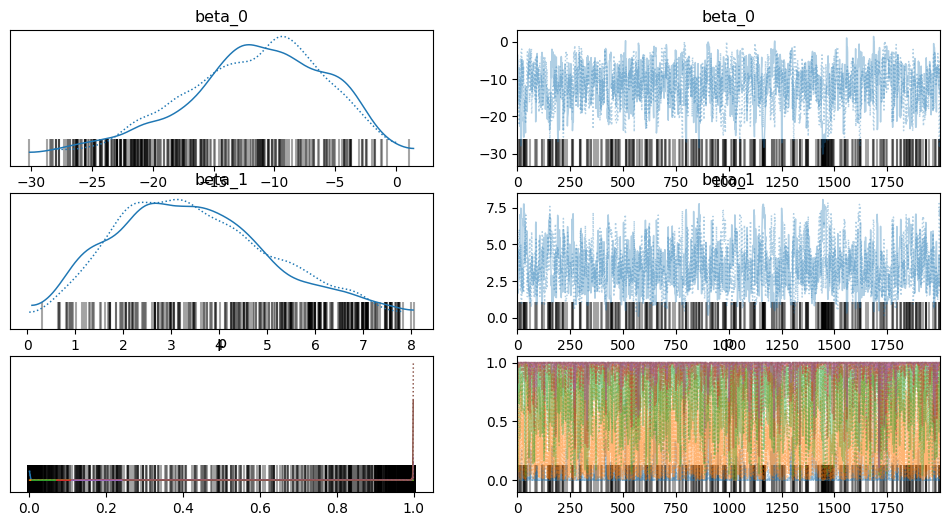

Frontiera de decizie: 3.31 ore de studiu


In [4]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

hours_study = np.array([1, 3, 4, 5, 6, 8])  # ore de studiu
pass_exam = np.array([0, 0, 1, 1, 1, 1])    # promovare (0/1)

# Modelul Bayesian de regresie logistica
with pm.Model() as logistic_model:
    # Prior pentru coeficienti (slab informativi)
    beta_0 = pm.Normal('beta_0', mu=0, sigma=10)
    beta_1 = pm.Normal('beta_1', mu=0, sigma=10)

    # Logit transform
    logit_p = beta_0 + beta_1 * hours_study

    p = pm.Deterministic('p', pm.math.sigmoid(logit_p))
    y_obs = pm.Bernoulli('y_obs', p=p, observed=pass_exam)

    # Esantionarea din distributia posterioara
    trace = pm.sample(2000, tune=1000, cores=1)


pm.plot_trace(trace)
plt.show()

# Frontiera de decizie (P = 50%)
beta_0_post = trace.posterior['beta_0'].mean().item()
beta_1_post = trace.posterior['beta_1'].mean().item()
decision_boundary = -beta_0_post / beta_1_post
print(f"Frontiera de decizie: {decision_boundary:.2f} ore de studiu")


Exercitiul 2

Output()

Output()

ERROR:pymc.stats.convergence:There were 2340 divergences after tuning. Increase `target_accept` or reparameterize.


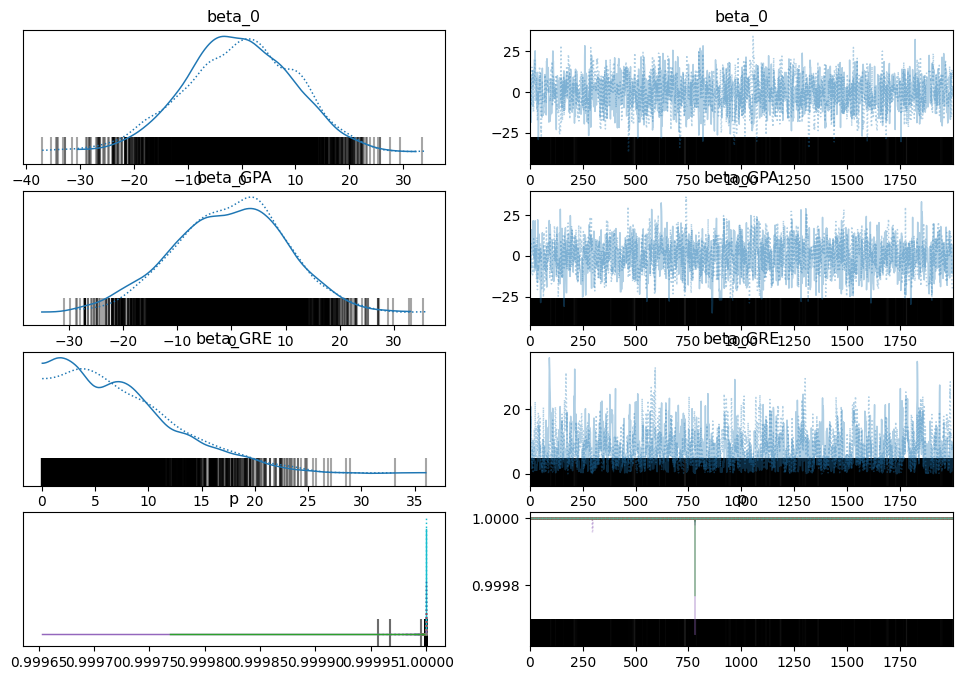

Probabilitatea de admitere (GRE=550, GPA=3.5): 1.00
Probabilitatea de admitere (GRE=500, GPA=3.2): 1.00


In [5]:
import pandas as pd

np.random.seed(42)
n = 400
GRE = np.random.normal(500, 50, n)  # GRE scor
GPA = np.random.normal(3.0, 0.5, n)  # GPA scor
admitted = (0.01 * GRE + 0.8 * GPA + np.random.normal(0, 0.5, n)) > 4.5  # Decizie binara (1/0)

# Model Bayesian de regresie logistica cu 2 predictori
with pm.Model() as logistic_model_2:
    beta_0 = pm.Normal('beta_0', mu=0, sigma=10)
    beta_GRE = pm.Normal('beta_GRE', mu=0, sigma=10)
    beta_GPA = pm.Normal('beta_GPA', mu=0, sigma=10)

    logit_p = beta_0 + beta_GRE * GRE + beta_GPA * GPA
    p = pm.Deterministic('p', pm.math.sigmoid(logit_p))
    y_obs = pm.Bernoulli('y_obs', p=p, observed=admitted)

    trace_2 = pm.sample(2000, tune=1000, cores=1)

pm.plot_trace(trace_2)
plt.show()

GRE_test = 550
GPA_test = 3.5
p_admission = 1 / (1 + np.exp(-(trace_2.posterior['beta_0'].mean()
                                + trace_2.posterior['beta_GRE'].mean() * GRE_test
                                + trace_2.posterior['beta_GPA'].mean() * GPA_test)))
print(f"Probabilitatea de admitere (GRE=550, GPA=3.5): {p_admission:.2f}")

GRE_test_2 = 500
GPA_test_2 = 3.2
p_admission_2 = 1 / (1 + np.exp(-(trace_2.posterior['beta_0'].mean()
                                  + trace_2.posterior['beta_GRE'].mean() * GRE_test_2
                                  + trace_2.posterior['beta_GPA'].mean() * GPA_test_2)))
print(f"Probabilitatea de admitere (GRE=500, GPA=3.2): {p_admission_2:.2f}")
